Names & IDs

Kareem Hany Mohamed   2018/04373

Ziad ahmed ibrahim    2018/03246

Salma Mohamed Hashim 2018/15644

Problem statement:

we are making our new store for clothes and currently we need to design an application/Website that uses Deep learning Algorithms and autonomously can price the products based on it's type 



Motivation: 

our goal is to design a deep learning model that can predict the type of the clothes and based on it's type it puts a price for it

Import Needed Libraries

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import datasets ,layers,optimizers,losses

Training our dataset on CNN Model


In [3]:
# Loading Dataset and unpacking it
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
# Normalizing the data
x_train_final=x_train/255
x_test_final=x_test/255
# Reshapping Images 
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Building the model
model=tf.keras.models.Sequential()
# Hidden Layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # increasing kernel size costs more computation 
model.add(tf.keras.layers.MaxPooling2D((2, 2))) #Max pooling is a type of down-sampling operation used in convolutional neural networks.
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.01)) #helps prevent overfitting.
# Output Layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))
# Compile the Model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy --> It is used to calculate the loss function when the data is categorical (Includes more than 1 class), i choosed sparse because we have decimal values numbered from (0-9) 
# Training the Model
result=model.fit(x_train,y_train,epochs=10)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.6838 - accuracy: 0.8407
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2966 - accuracy: 0.8900
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2597 - accuracy: 0.9039
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2342 - accuracy: 0.9120
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2151 - accuracy: 0.9184
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1990 - accuracy: 0.9260
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1811 - accuracy: 0.9317
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1711 - accuracy: 0.9362
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1542 - accuracy: 0.9430
E

  Evaluating the CNN Model Used

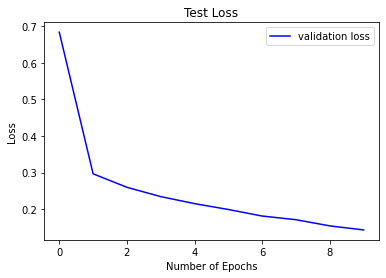

In [5]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(result.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Training our dataset on VGG-16 Model

In [6]:
# Loading Dataset and unpacking it
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
# Normalizing the data
x_train_final=x_train/255
x_test_final=x_test/255
# Reshapping Images 
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Building the model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 676s 719ms/step - loss: 0.5580 - accuracy: 0.8036
Epoch 2/5
938/938 [==============================] - 657s 700ms/step - loss: 0.3258 - accuracy: 0.8841
Epoch 3/5
938/938 [==============================] - 640s 682ms/step - loss: 0.2839 - accuracy: 0.8962
Epoch 4/5
938/938 [==============================] - 642s 684ms/step - loss: 0.2604 - accuracy: 0.9057
Epoch 5/5
313/313 [==============================] - 29s 91ms/step - loss: 0.2972 - accuracy: 0.8954
Test accuracy: 0.8953999876976013


Evaluating the VGG-16 Model used

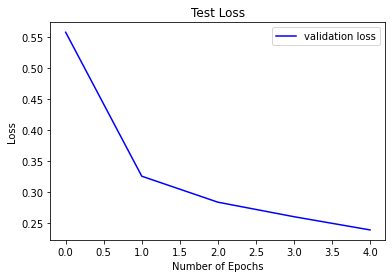

In [7]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()